Google Colab上執行  
使用Lena，放在google colab的sample_data目錄下後再進行存取  
SourceCode@Google Colab: https://colab.research.google.com/drive/16ogD2bJ0l-1XOUOfseKIeTeTBHDnQocN

# 在OpenCV使用SIFT，需要再另外安裝Library，執行以下命令取得SIFT library

In [1]:
!pip install opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 30.6MB 141kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


# 開始執行處理

In [0]:
# _*_ coding: utf-8 _*_
# _*_ coding: cp950 _*_

# author: Chi-Hsu Chen (css920@gmail.com)
# datetime: 20200602

import numpy as np
import cv2
import time
from google.colab.patches import cv2_imshow

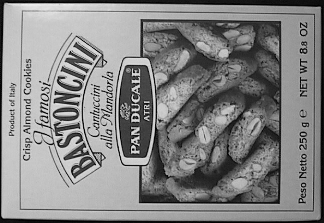

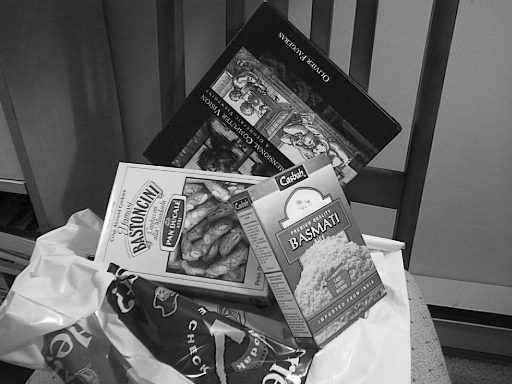

In [13]:
# 載入圖片
img_query = cv2.imread('sample_data/box.png', cv2.IMREAD_GRAYSCALE)
img_train = cv2.imread('sample_data/box_in_scene.png', cv2.IMREAD_GRAYSCALE)

cv2_imshow(img_query)
cv2_imshow(img_train)

# 建立SIFT
objSIFT=cv2.xfeatures2d_SIFT.create()

# 建立並偵測SIFT特徵(keypoints, descriptor)
keypts_query,desc_query=objSIFT.detectAndCompute(img_query,None)
keypts_train,desc_train=objSIFT.detectAndCompute(img_train,None)


# 基於KNN的SIFT暴力比對

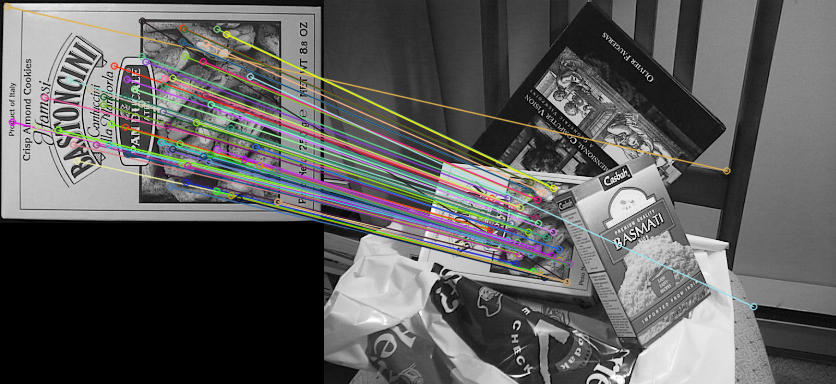

In [14]:
objBruteForce=cv2.BFMatcher(cv2.NORM_L2)

# 使用剛剛建立的Brute Force物件，建立knn比對;因為此處是針對img_query & img_train，所以k=2
# 比對128維的descriptor
matches=objBruteForce.knnMatch(desc_query,desc_train,k=2)

# 距離0.75之內納入
candidate=[]
for m,n in matches:
  if m.distance < 0.75*n.distance:
    candidate.append([m])

# flags=2 代表沒有配對成功的關鍵點不會被畫出來
img_show = cv2.drawMatchesKnn(img_query, keypts_query, img_train, keypts_train, candidate, None, flags=2)

cv2_imshow(img_show)